In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data import and cleaning

In [2]:
climate_data = pd.read_csv('climate_nasa.csv')

In [3]:
climate_data.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [4]:
climate_data.columns

Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')

In [5]:
climate_data.describe()

,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


In [6]:
missing_values = climate_data.isnull().sum()
missing_values

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

In [7]:
duplicate_rows = climate_data.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: 0


In [8]:
climate_data['comment_length'] = climate_data['text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
comment_length_summary = climate_data['comment_length'].describe()
print(comment_length_summary)

count     522.000000
mean      179.038314
std       519.980262
min         0.000000
25%        37.000000
50%        88.500000
75%       176.000000
max      7649.000000
Name: comment_length, dtype: float64


# Sentiment Analysis

In [9]:
climate_data.shape

(522, 6)

In [10]:
from textblob import TextBlob

In [11]:
data_clean = climate_data.dropna(subset=['text'])

In [12]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [13]:
data_clean['sentiment'] = data_clean['text'].apply(get_sentiment)

C:\Users\khanf\AppData\Local\Temp\ipykernel_2484\2790593507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['sentiment'] = data_clean['text'].apply(get_sentiment)


In [14]:
data_clean['sentiment_category'] = pd.cut(data_clean['sentiment'], 
                                          bins=[-1, -0.01, 0.01, 1], 
                                          labels=['Negative', 'Neutral', 'Positive'])

C:\Users\khanf\AppData\Local\Temp\ipykernel_2484\4047612139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['sentiment_category'] = pd.cut(data_clean['sentiment'],


In [15]:
sentiment_distribution = data_clean['sentiment_category'].value_counts()
print(sentiment_distribution)

sentiment_category
Neutral     209
Positive    205
Negative     89
Name: count, dtype: int64


# Word Cloud Visualization

In [16]:
from wordcloud import WordCloud

In [17]:
comment_text = ' '.join(data_clean['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(comment_text)

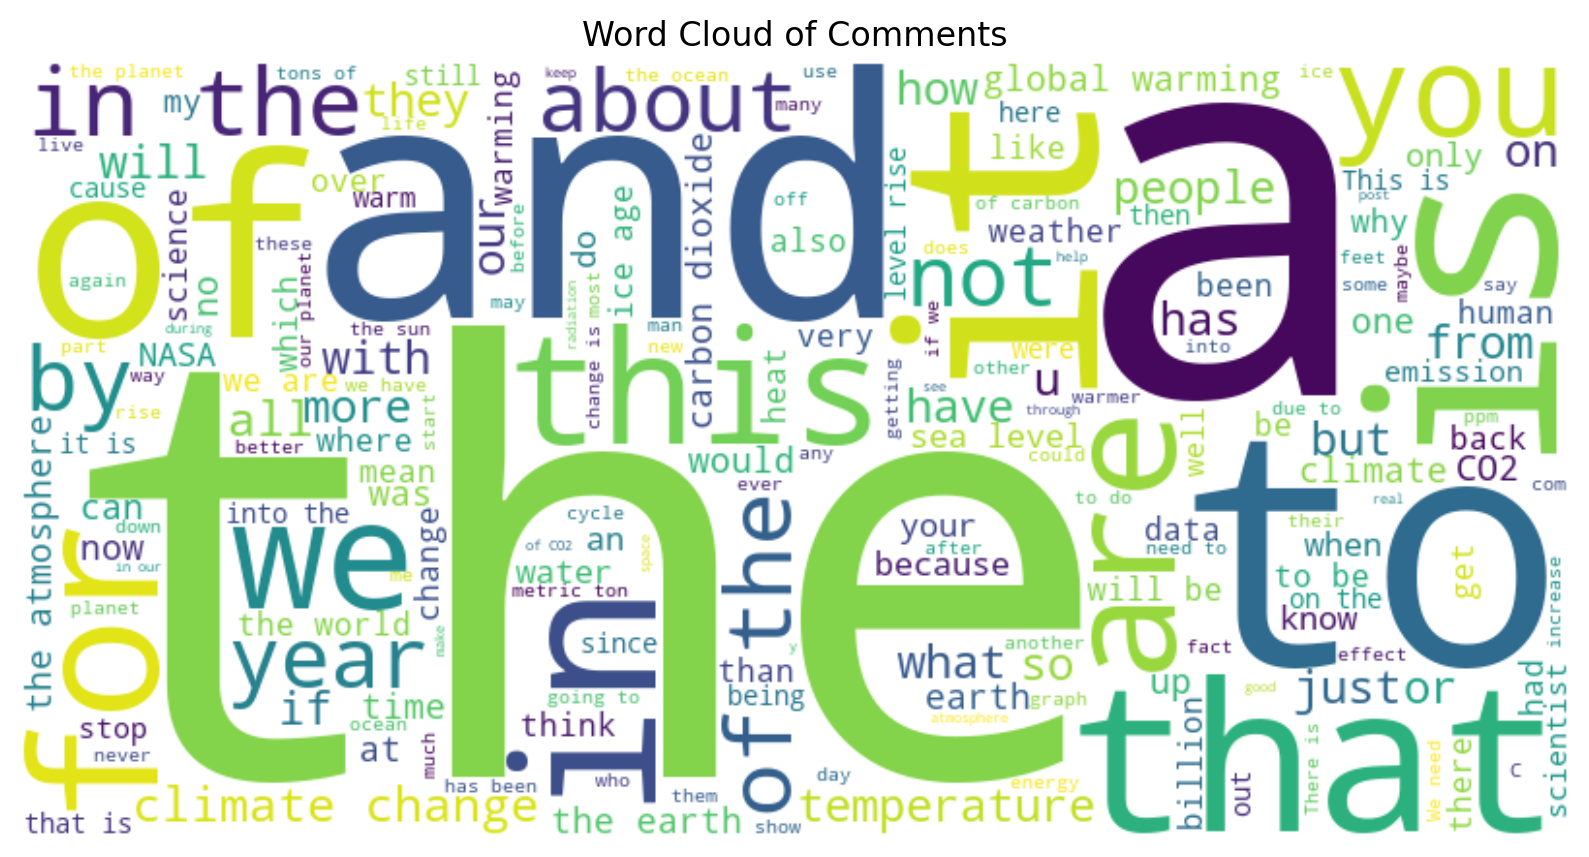

In [18]:
plt.figure(figsize=(10,6),dpi=200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

# Trend Analysis

In [19]:
data_clean['date'] = pd.to_datetime(data_clean['date'], errors='coerce')

C:\Users\khanf\AppData\Local\Temp\ipykernel_2484\1147817703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['date'] = pd.to_datetime(data_clean['date'], errors='coerce')


In [20]:
data_clean['year_month'] = data_clean['date'].dt.to_period('M')

C:\Users\khanf\AppData\Local\Temp\ipykernel_2484\2458742334.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data_clean['year_month'] = data_clean['date'].dt.to_period('M')
C:\Users\khanf\AppData\Local\Temp\ipykernel_2484\2458742334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['year_month'] = data_clean['date'].dt.to_period('M')


In [21]:
trend_data = data_clean.groupby('year_month').agg({
    'sentiment': 'mean',
    'likesCount': 'sum',
    'commentsCount': 'sum'
}).reset_index()

In [22]:
trend_data = trend_data.sort_values('year_month')

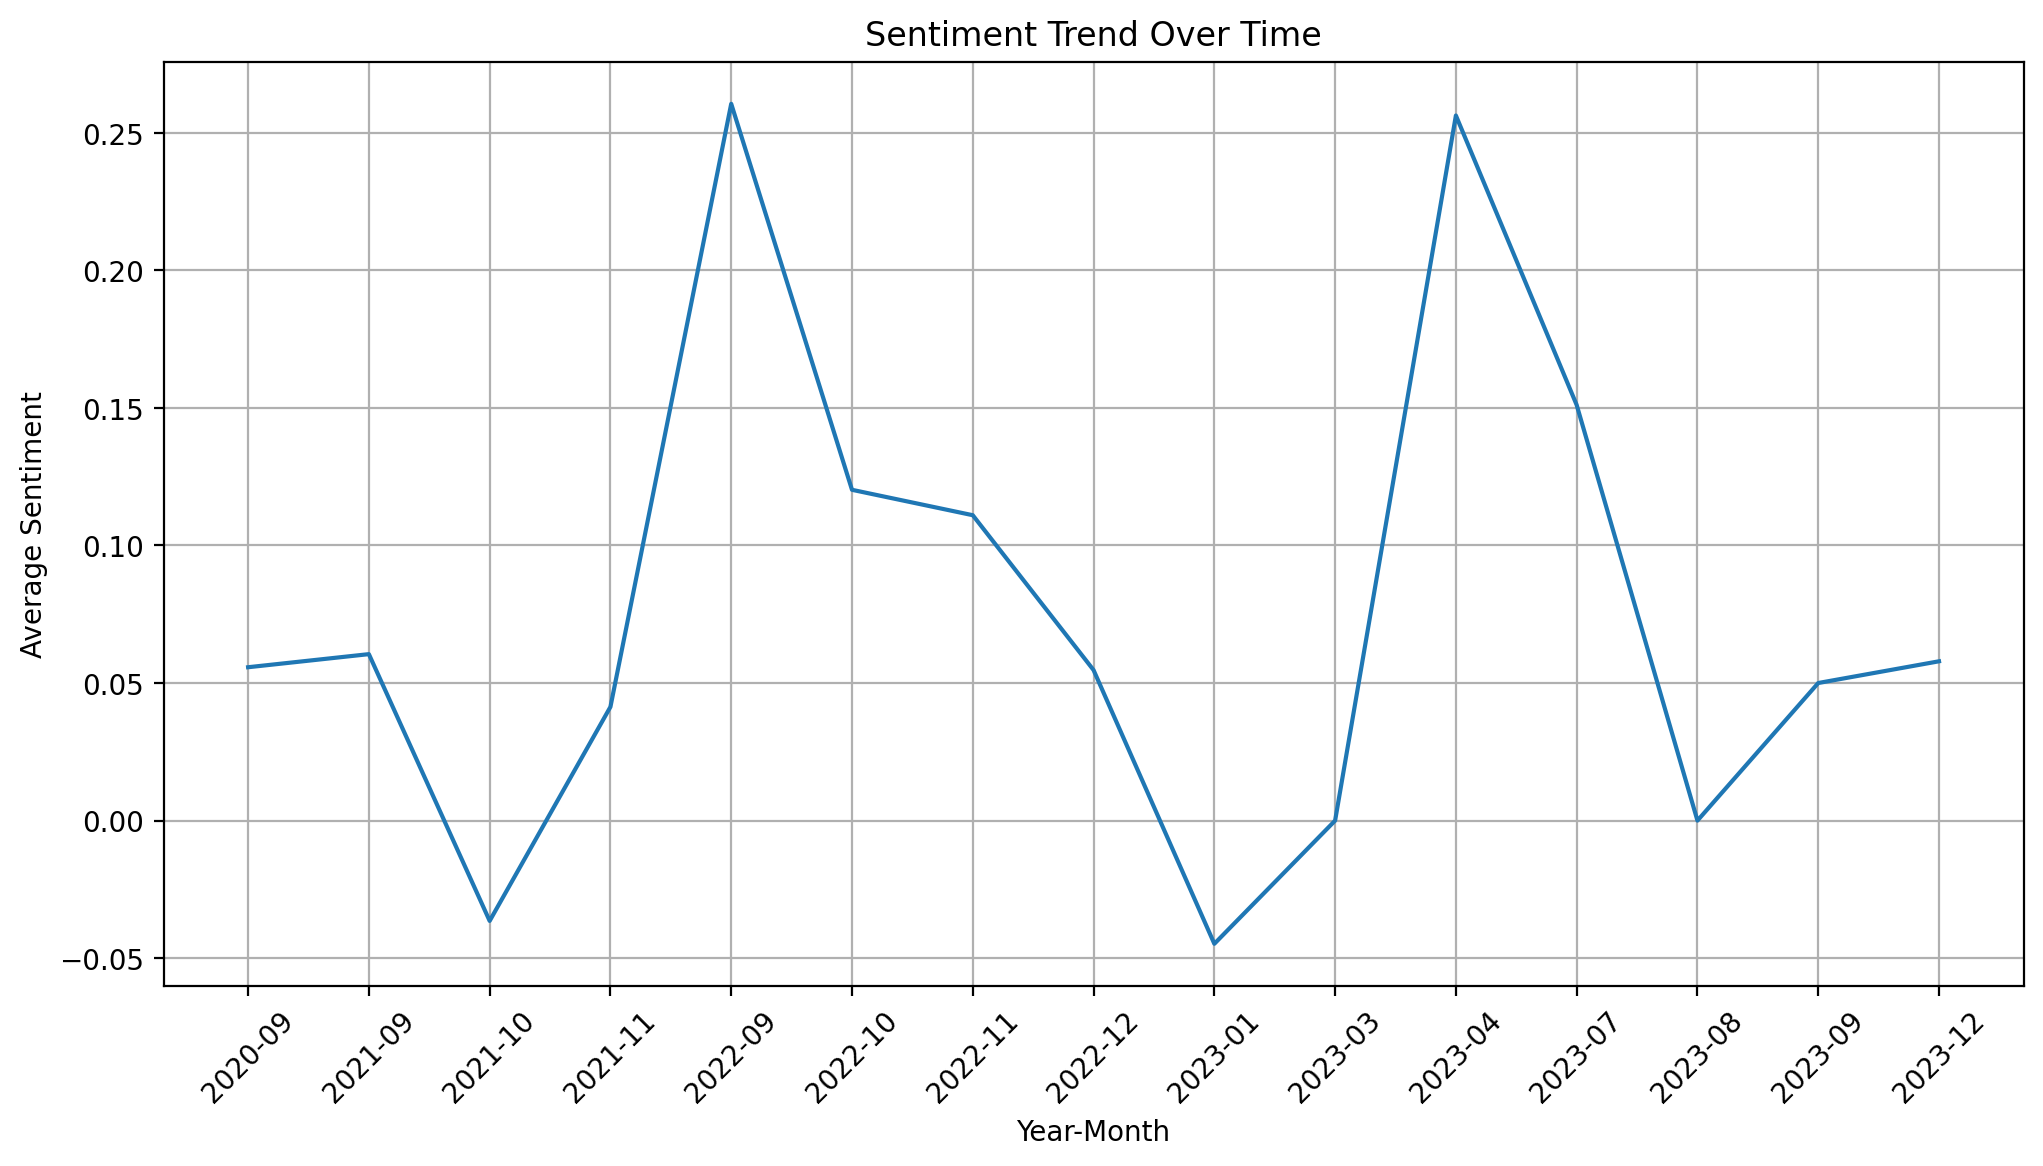

In [23]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(trend_data['year_month'].astype(str), trend_data['sentiment'], label='Average Sentiment')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Average Sentiment')
plt.title('Sentiment Trend Over Time')
plt.grid(True)
plt.show()

# Engagement Analysis

In [24]:
correlation_matrix = data_clean[['likesCount', 'commentsCount', 'sentiment']].corr()

In [25]:
correlation_matrix

,likesCount,commentsCount,sentiment
likesCount,1.000000,0.369914,0.035299
commentsCount,0.369914,1.000000,-0.065477
sentiment,0.035299,-0.065477,1.000000


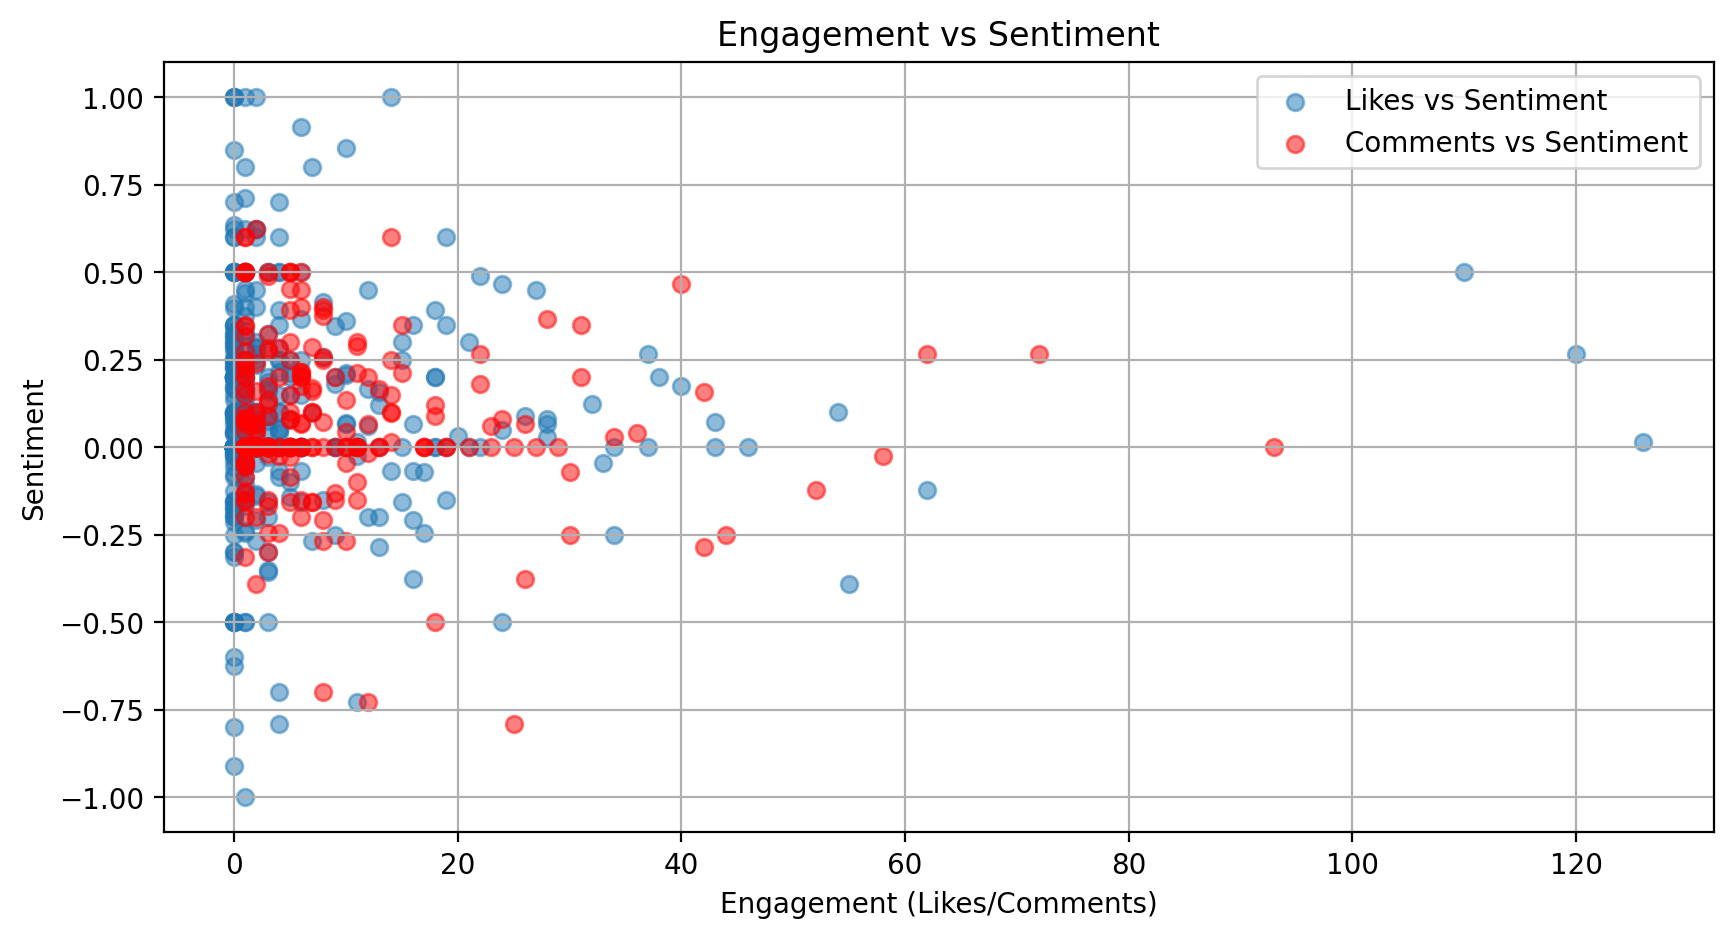

In [26]:
plt.figure(figsize=(10,5),dpi=200)
plt.scatter(data_clean['likesCount'], data_clean['sentiment'], alpha=0.5, label='Likes vs Sentiment')
plt.scatter(data_clean['commentsCount'], data_clean['sentiment'], alpha=0.5, color='r', label='Comments vs Sentiment')
plt.xlabel('Engagement (Likes/Comments)')
plt.ylabel('Sentiment')
plt.title('Engagement vs Sentiment')
plt.legend()
plt.grid(True)
plt.show()

# Topic Modeling

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [28]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
comment_matrix = vectorizer.fit_transform(data_clean['text'])

In [29]:
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(comment_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [30]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}: ", [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])

In [31]:
no_top_words = 10
display_topics(lda_model, vectorizer.get_feature_names_out(), no_top_words)

Topic 0:  ['climate', 'change', 'people', 'nasa', 'planet', 'earth', 'just', 'data', 'world', 'make']
Topic 1:  ['global', 'don', 'going', 'anos', 'science', 'know', 'weather', 'climate', 'just', 'temperature']
Topic 2:  ['carbon', 'water', 'dioxide', 'atmosphere', 'sea', 'level', 'feet', 'years', 'rise', 'co2']
Topic 3:  ['earth', 'co2', 'sun', 'years', 'heat', 'just', 'atmosphere', 'time', 'climate', 'change']
Topic 4:  ['global', 'warming', 'need', 'climate', 'change', 'energy', 'human', 'planet', 'year', 'better']


# Engagement Correlations

In [32]:
correlation_matrix = data_clean[['likesCount', 'commentsCount', 'sentiment']].corr()

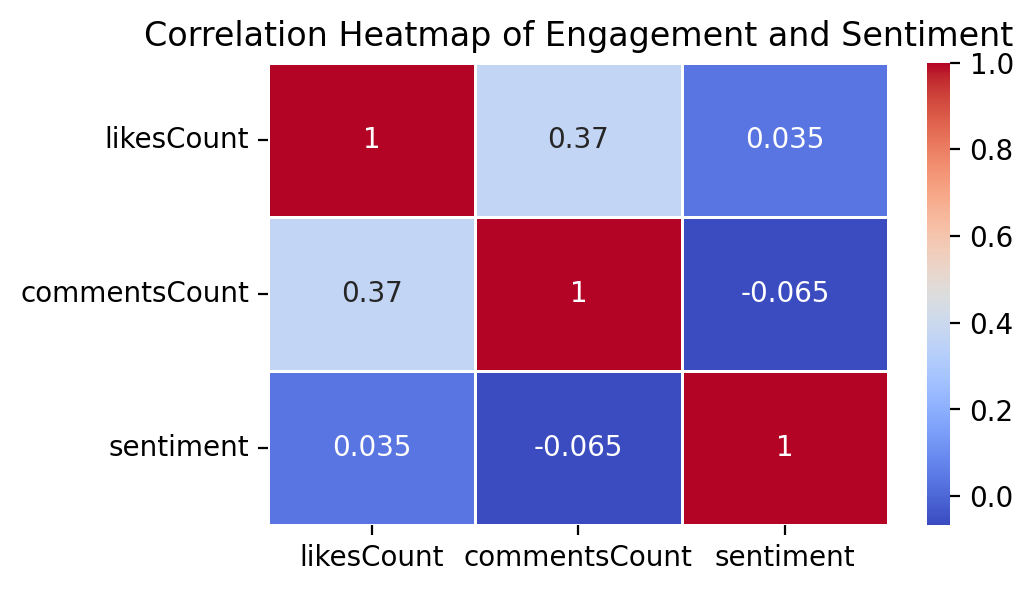

In [35]:
plt.figure(figsize=(5,3),dpi=200)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Engagement and Sentiment')
plt.show()